In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv('Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv')
df 

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53387,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,Asian,RACE,RACEASN
53388,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,Hawaiian/Pacific Islander,RACE,RACEHPI
53389,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA
53390,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,2 or more races,RACE,RACE2PLUS


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   53392 non-null  int64  
 1   YearEnd                     53392 non-null  int64  
 2   LocationAbbr                53392 non-null  object 
 3   LocationDesc                53392 non-null  object 
 4   Datasource                  53392 non-null  object 
 5   Class                       53392 non-null  object 
 6   Topic                       53392 non-null  object 
 7   Question                    53392 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             53392 non-null  object 
 10  Data_Value                  48346 non-null  float64
 11  Data_Value_Alt              48346 non-null  float64
 12  Data_Value_Footnote_Symbol  5046 non-null   object 
 13  Data_Value_Footnote         504

In [4]:
df = df.drop(['Low_Confidence_Limit','High_Confidence_Limit ', 'Total', 'Data_Value_Alt', 'YearEnd','Topic','Class','Datasource','Data_Value_Unit','QuestionID','ClassID','TopicID','DataValueTypeID','Data_Value_Type','Data_Value_Footnote_Symbol','Data_Value_Footnote','StratificationCategoryId1','StratificationID1'],1);
df = df.drop(['GeoLocation', 'Question', 'StratificationCategory1', 'Stratification1', 'Gender'],1)

C:\Users\achau\AppData\Local\Temp\ipykernel_252\656730159.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['Low_Confidence_Limit','High_Confidence_Limit ', 'Total', 'Data_Value_Alt', 'YearEnd','Topic','Class','Datasource','Data_Value_Unit','QuestionID','ClassID','TopicID','DataValueTypeID','Data_Value_Type','Data_Value_Footnote_Symbol','Data_Value_Footnote','StratificationCategoryId1','StratificationID1'],1);
C:\Users\achau\AppData\Local\Temp\ipykernel_252\656730159.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['GeoLocation', 'Question', 'StratificationCategory1', 'Stratification1', 'Gender'],1)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   YearStart       53392 non-null  int64  
 1   LocationAbbr    53392 non-null  object 
 2   LocationDesc    53392 non-null  object 
 3   Data_Value      48346 non-null  float64
 4   Sample_Size     48346 non-null  float64
 5   Age(years)      11438 non-null  object 
 6   Education       7628 non-null   object 
 7   Income          13349 non-null  object 
 8   Race/Ethnicity  15256 non-null  object 
 9   LocationID      53392 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 4.1+ MB


In [6]:
df=df.dropna(subset=['Education'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7628 entries, 3 to 53370
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   YearStart       7628 non-null   int64  
 1   LocationAbbr    7628 non-null   object 
 2   LocationDesc    7628 non-null   object 
 3   Data_Value      7628 non-null   float64
 4   Sample_Size     7628 non-null   float64
 5   Age(years)      0 non-null      object 
 6   Education       7628 non-null   object 
 7   Income          0 non-null      object 
 8   Race/Ethnicity  0 non-null      object 
 9   LocationID      7628 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 655.5+ KB


In [7]:
def lower_case_column_names(df):
    df.columns=[i.lower() for i in df.columns]
    return df

In [8]:
df=lower_case_column_names(df)
df

,yearstart,locationabbr,locationdesc,data_value,sample_size,age(years),education,income,race/ethnicity,locationid
3,2011,AL,Alabama,33.6,1153.0,NaN,Less than high school,NaN,NaN,1
4,2011,AL,Alabama,32.8,2402.0,NaN,High school graduate,NaN,NaN,1
5,2011,AL,Alabama,33.8,1925.0,NaN,Some college or technical school,NaN,NaN,1
6,2011,AL,Alabama,26.4,1812.0,NaN,College graduate,NaN,NaN,1
31,2011,AL,Alabama,33.2,1153.0,NaN,Less than high school,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...
53343,2016,PR,Puerto Rico,33.9,1735.0,NaN,College graduate,NaN,NaN,72
53367,2016,VI,Virgin Islands,29.2,238.0,NaN,Less than high school,NaN,NaN,78
53368,2016,VI,Virgin Islands,26.9,394.0,NaN,High school graduate,NaN,NaN,78
53369,2016,VI,Virgin Islands,31.2,230.0,NaN,Some college or technical school,NaN,NaN,78


In [9]:
df.dtypes

yearstart           int64
locationabbr       object
locationdesc       object
data_value        float64
sample_size       float64
age(years)         object
education          object
income             object
race/ethnicity     object
locationid          int64
dtype: object

In [10]:
print(df.duplicated().sum())

8


In [11]:
df = df.drop_duplicates()

In [12]:
df.isna()

,yearstart,locationabbr,locationdesc,data_value,sample_size,age(years),education,income,race/ethnicity,locationid
3,False,False,False,False,False,True,False,True,True,False
4,False,False,False,False,False,True,False,True,True,False
5,False,False,False,False,False,True,False,True,True,False
6,False,False,False,False,False,True,False,True,True,False
31,False,False,False,False,False,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...
53343,False,False,False,False,False,True,False,True,True,False
53367,False,False,False,False,False,True,False,True,True,False
53368,False,False,False,False,False,True,False,True,True,False
53369,False,False,False,False,False,True,False,True,True,False


In [13]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

yearstart           0.0
locationabbr        0.0
locationdesc        0.0
data_value          0.0
sample_size         0.0
age(years)        100.0
education           0.0
income            100.0
race/ethnicity    100.0
locationid          0.0
dtype: float64

In [14]:
df = df.drop(['age(years)'],1)

C:\Users\achau\AppData\Local\Temp\ipykernel_252\1262596484.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['age(years)'],1)


In [15]:
def remove_outliers(df):
    for col in df.select_dtypes(include=np.number).columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        df.drop(df[(df[col] < lower_bound) | (df[col] > upper_bound)].index, inplace=True)

In [16]:
remove_outliers(df)
df

,yearstart,locationabbr,locationdesc,data_value,sample_size,education,income,race/ethnicity,locationid
3,2011,AL,Alabama,33.6,1153.0,Less than high school,NaN,NaN,1
4,2011,AL,Alabama,32.8,2402.0,High school graduate,NaN,NaN,1
5,2011,AL,Alabama,33.8,1925.0,Some college or technical school,NaN,NaN,1
6,2011,AL,Alabama,26.4,1812.0,College graduate,NaN,NaN,1
31,2011,AL,Alabama,33.2,1153.0,Less than high school,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...
53343,2016,PR,Puerto Rico,33.9,1735.0,College graduate,NaN,NaN,72
53367,2016,VI,Virgin Islands,29.2,238.0,Less than high school,NaN,NaN,78
53368,2016,VI,Virgin Islands,26.9,394.0,High school graduate,NaN,NaN,78
53369,2016,VI,Virgin Islands,31.2,230.0,Some college or technical school,NaN,NaN,78


In [17]:
def standardize_text(df):
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].str.lower()

In [18]:
standardize_text(df)
df

,yearstart,locationabbr,locationdesc,data_value,sample_size,education,income,race/ethnicity,locationid
3,2011,al,alabama,33.6,1153.0,less than high school,NaN,NaN,1
4,2011,al,alabama,32.8,2402.0,high school graduate,NaN,NaN,1
5,2011,al,alabama,33.8,1925.0,some college or technical school,NaN,NaN,1
6,2011,al,alabama,26.4,1812.0,college graduate,NaN,NaN,1
31,2011,al,alabama,33.2,1153.0,less than high school,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...
53343,2016,pr,puerto rico,33.9,1735.0,college graduate,NaN,NaN,72
53367,2016,vi,virgin islands,29.2,238.0,less than high school,NaN,NaN,78
53368,2016,vi,virgin islands,26.9,394.0,high school graduate,NaN,NaN,78
53369,2016,vi,virgin islands,31.2,230.0,some college or technical school,NaN,NaN,78


In [19]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
numerical = df[numerical_columns]
numerical

,yearstart,data_value,sample_size,locationid
3,2011,33.6,1153.0,1
4,2011,32.8,2402.0,1
5,2011,33.8,1925.0,1
6,2011,26.4,1812.0,1
31,2011,33.2,1153.0,1
...,...,...,...,...
53343,2016,33.9,1735.0,72
53367,2016,29.2,238.0,78
53368,2016,26.9,394.0,78
53369,2016,31.2,230.0,78


In [20]:
numerical = numerical.fillna(numerical.mean())
numerical

,yearstart,data_value,sample_size,locationid
3,2011,33.6,1153.0,1
4,2011,32.8,2402.0,1
5,2011,33.8,1925.0,1
6,2011,26.4,1812.0,1
31,2011,33.2,1153.0,1
...,...,...,...,...
53343,2016,33.9,1735.0,72
53367,2016,29.2,238.0,78
53368,2016,26.9,394.0,78
53369,2016,31.2,230.0,78


In [21]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical = df[categorical_columns]
categorical

,locationabbr,locationdesc,education,income,race/ethnicity
3,al,alabama,less than high school,NaN,NaN
4,al,alabama,high school graduate,NaN,NaN
5,al,alabama,some college or technical school,NaN,NaN
6,al,alabama,college graduate,NaN,NaN
31,al,alabama,less than high school,NaN,NaN
...,...,...,...,...,...
53343,pr,puerto rico,college graduate,NaN,NaN
53367,vi,virgin islands,less than high school,NaN,NaN
53368,vi,virgin islands,high school graduate,NaN,NaN
53369,vi,virgin islands,some college or technical school,NaN,NaN


In [22]:
categorical

,locationabbr,locationdesc,education,income,race/ethnicity
3,al,alabama,less than high school,NaN,NaN
4,al,alabama,high school graduate,NaN,NaN
5,al,alabama,some college or technical school,NaN,NaN
6,al,alabama,college graduate,NaN,NaN
31,al,alabama,less than high school,NaN,NaN
...,...,...,...,...,...
53343,pr,puerto rico,college graduate,NaN,NaN
53367,vi,virgin islands,less than high school,NaN,NaN
53368,vi,virgin islands,high school graduate,NaN,NaN
53369,vi,virgin islands,some college or technical school,NaN,NaN


In [23]:
categorical.columns

Index(['locationabbr', 'locationdesc', 'education', 'income',
       'race/ethnicity'],
      dtype='object')

In [24]:
in_map = {'less than $15,000':0, '15000-24,999':1, '25000-34,999':2,'35000-49,999':3, '50000-74,999':4,
          '$75,000 or greater':5, 'data not reported':6}
in_map
df['income'] = df['income'].map(in_map)

In [25]:
ed_map = {'less than high school': 0, 'high school graduate':1, 'some college or technical school':2,'college graduate':3}
ed_map
df['education'] = df['education'].map(ed_map)

In [26]:
rc_map = {'non-hispanic white': 0, 'non-hispanic black':1, 'hispanic':2,'asian':3, 'hawaiian/pacific islander':4,
       'american indian/alaska native':5, '2 or more races':6, 'other':7}
rc_map
df['race/ethnicity'] = df['race/ethnicity'].map(rc_map)

In [27]:
df

,yearstart,locationabbr,locationdesc,data_value,sample_size,education,income,race/ethnicity,locationid
3,2011,al,alabama,33.6,1153.0,0,NaN,NaN,1
4,2011,al,alabama,32.8,2402.0,1,NaN,NaN,1
5,2011,al,alabama,33.8,1925.0,2,NaN,NaN,1
6,2011,al,alabama,26.4,1812.0,3,NaN,NaN,1
31,2011,al,alabama,33.2,1153.0,0,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...
53343,2016,pr,puerto rico,33.9,1735.0,3,NaN,NaN,72
53367,2016,vi,virgin islands,29.2,238.0,0,NaN,NaN,78
53368,2016,vi,virgin islands,26.9,394.0,1,NaN,NaN,78
53369,2016,vi,virgin islands,31.2,230.0,2,NaN,NaN,78


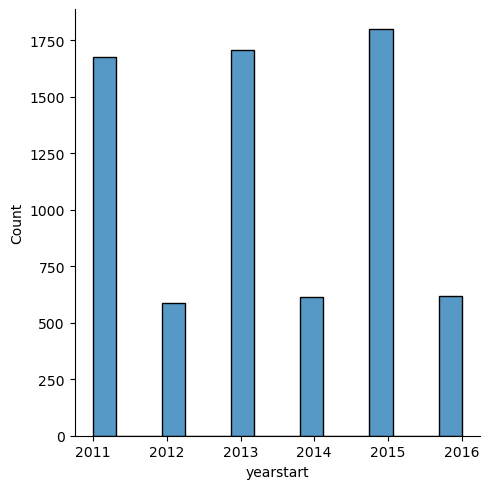

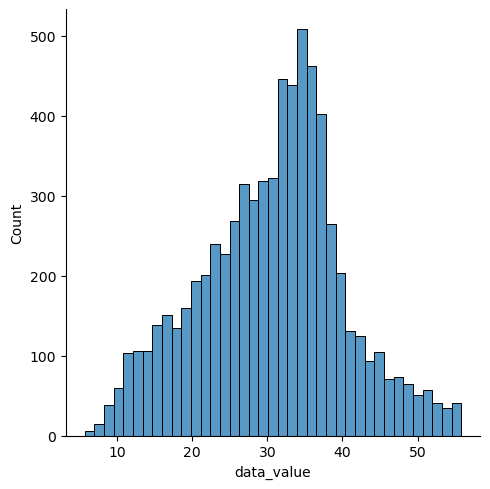

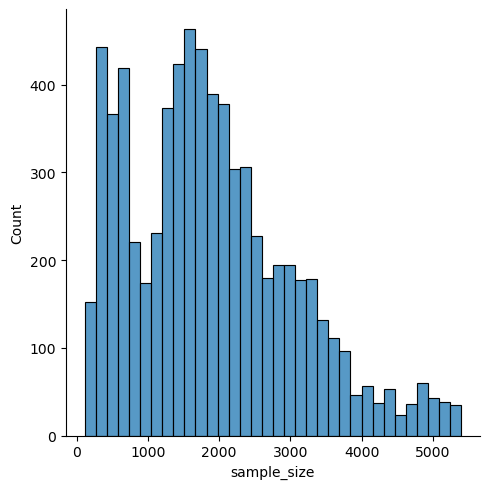

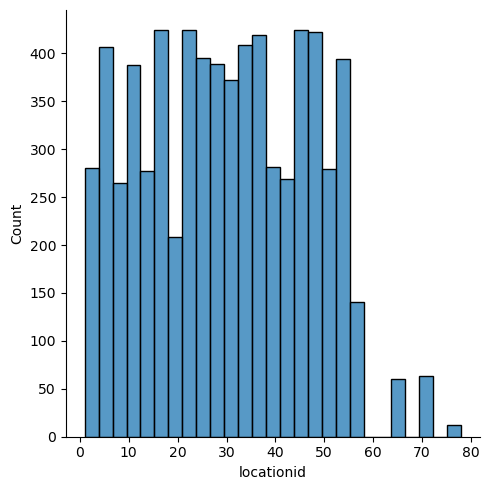

In [28]:
for col in numerical.columns:
    sns.displot(numerical[col])
    plt.show()

In [29]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7002 entries, 3 to 53370
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   yearstart    7002 non-null   int64  
 1   data_value   7002 non-null   float64
 2   sample_size  7002 non-null   float64
 3   locationid   7002 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 273.5 KB


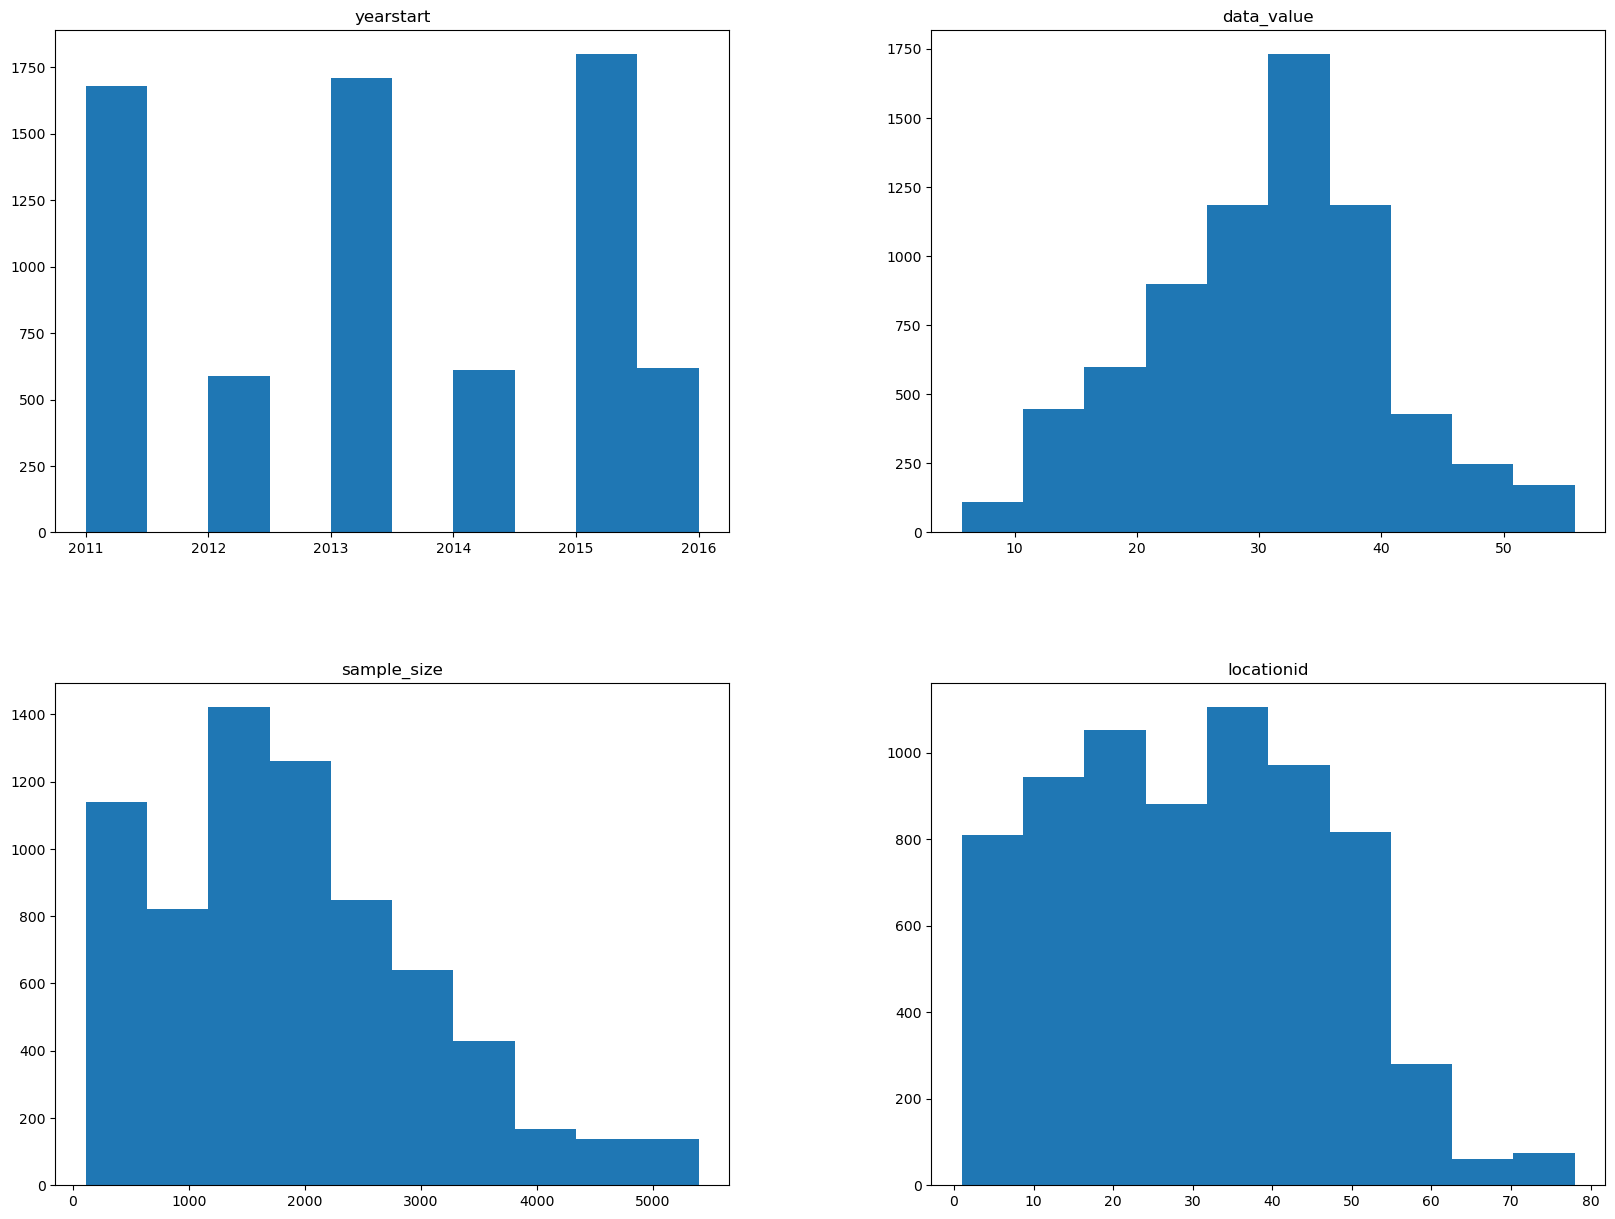

In [30]:
numerical.hist(figsize=(20,15), grid=False)
plt.show()

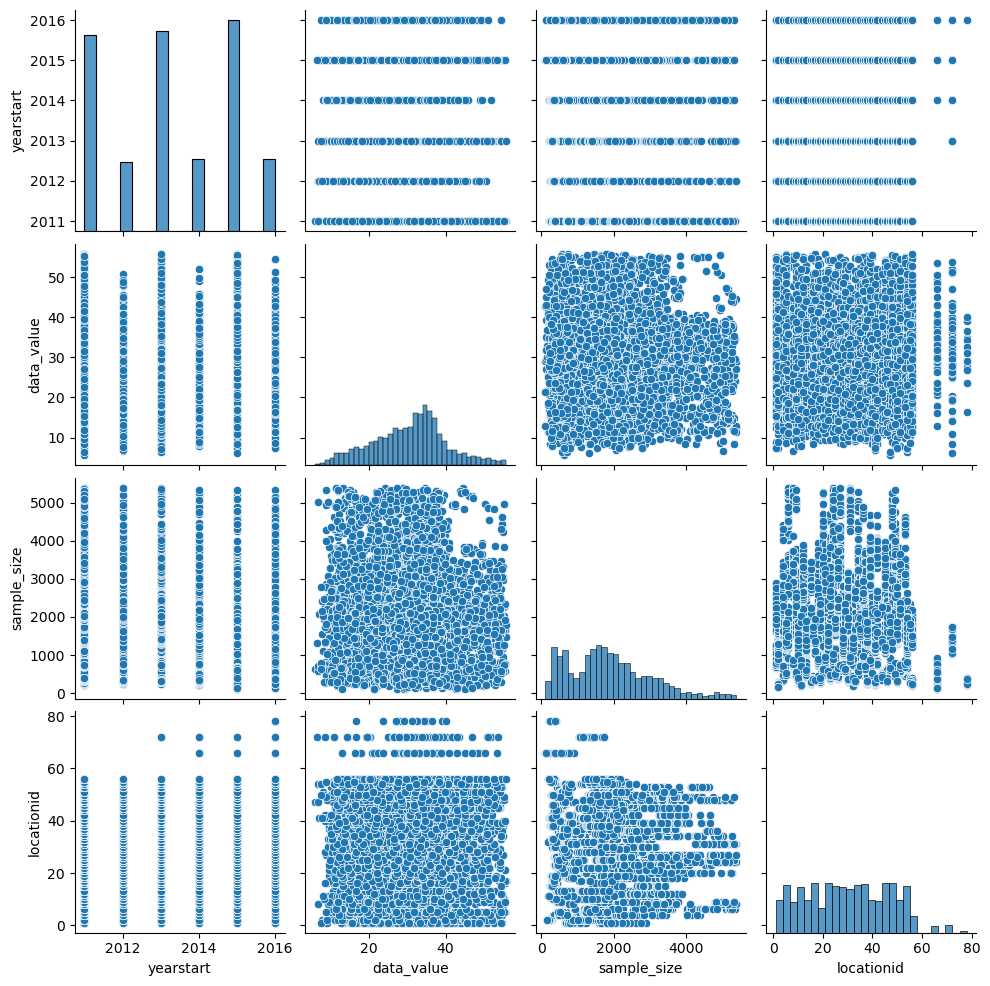

In [31]:
sns.pairplot(numerical)

In [32]:
numerical.corr()

,yearstart,data_value,sample_size,locationid
yearstart,1.000000,0.018635,-0.082100,0.045116
data_value,0.018635,1.000000,-0.123163,-0.005925
sample_size,-0.082100,-0.123163,1.000000,0.014645
locationid,0.045116,-0.005925,0.014645,1.000000


<Axes: >

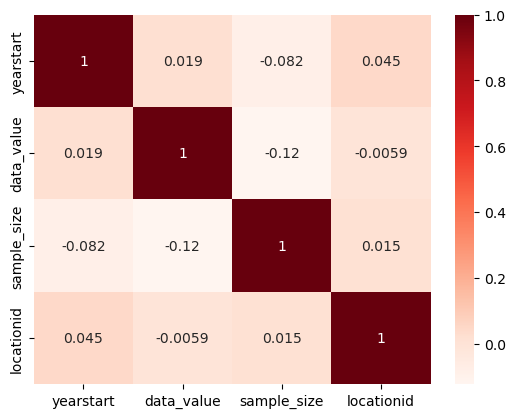

In [33]:
corr = numerical.corr()
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True, cmap='Reds')

In [34]:
X = df[['yearstart','education', 'locationid']]
y = numerical['data_value']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head(3)

,yearstart,education,locationid
28682,2011,2,46
9619,2011,0,18
41552,2015,1,27


In [36]:
std_scaler=StandardScaler().fit(X_train)

X_train_scaled=std_scaler.transform(X_train)

In [37]:
X_test_scaled=std_scaler.transform(X_test)

In [38]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[-1.36049885  0.51658519  0.97343952]
 [-1.36049885 -1.29506705 -0.710113  ]
 [ 1.00859153 -0.38924093 -0.16897112]
 ...
 [-0.17595366  0.51658519 -1.43163551]
 [-0.17595366  0.51658519 -1.01074738]
 [ 1.60086412  0.51658519 -0.28922487]]
--------
[[ 1.00859153 -0.38924093 -0.83036675]
 [ 1.00859153 -0.38924093  0.67280514]
 [-0.17595366  0.51658519 -1.25125488]
 ...
 [-0.17595366 -0.38924093 -1.01074738]
 [ 1.00859153  0.51658519  1.21394702]
 [-1.36049885  0.51658519  0.19179013]]


In [39]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled)

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             data_value   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     65.15
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           2.67e-41
Time:                        17:25:37   Log-Likelihood:                -17882.
No. Observations:                4901   AIC:                         3.577e+04
Df Residuals:                    4897   BIC:                         3.580e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.7432      0.133    231.398      0.0

In [40]:
predictions_test

array([31.69285639, 31.57173767, 29.85993716, ..., 31.51637563,
       29.85231747, 29.55264819])

In [41]:
print(model.rsquared_adj)

0.03778924451874288


In [42]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [43]:
model.coef_

array([ 0.0955075 , -1.67581747, -0.00484475])

In [44]:
model.intercept_

-159.00142455148398

In [45]:
model.score(X_test_scaled,y_test)

C:\Users\achau\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-377.7245386512909

In [46]:
y_pred=model.predict(X_test_scaled)

C:\Users\achau\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [47]:
y_test

35880    24.7
43487    27.8
4584     32.3
15275    29.2
19752    37.5
         ... 
22268    27.5
52827    37.5
7173     27.3
48279    25.6
20337    17.2
Name: data_value, Length: 2101, dtype: float64

In [48]:
y_pred

array([-158.24877682, -158.25605931, -159.87786991, ..., -158.36103588,
       -159.77668024, -159.99799405])

In [49]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

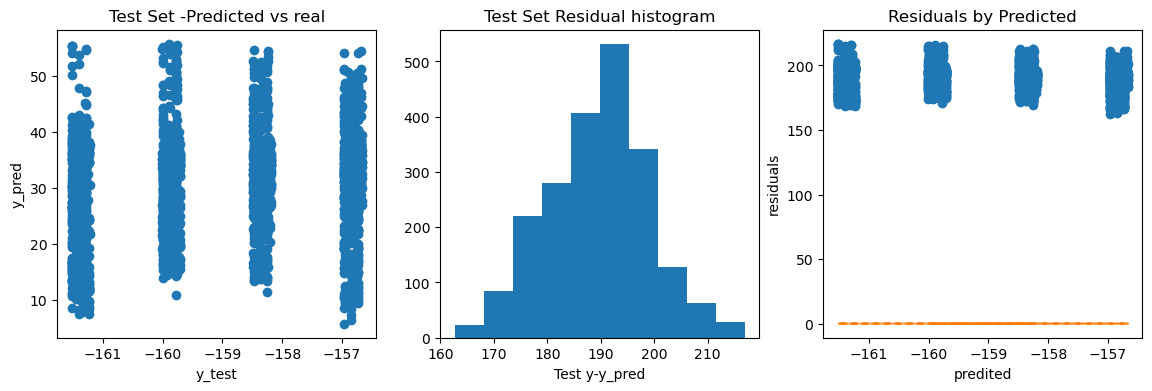

In [50]:
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

<Axes: xlabel='y_test', ylabel='y_pred'>

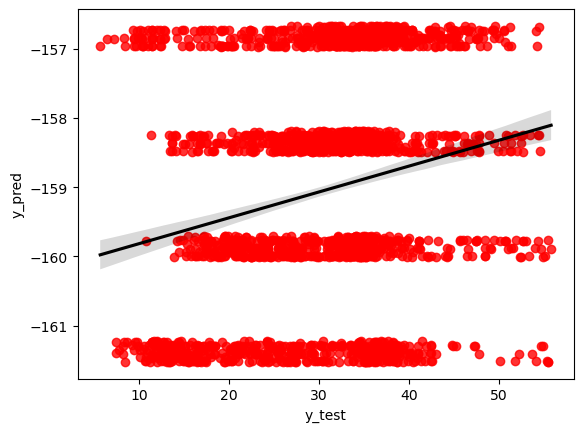

In [51]:
sns.regplot(x='y_test',y='y_pred', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

In [52]:
mse = mse(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2= 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Adjusted R-squared:", adj_r2)

Mean Squared Error: 35989.8116379868
R-squared: -377.7245386512909
Adjusted R-squared: -378.2663477194616


In [53]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [54]:
features_importances

,Attribute,Importance
1,education,1.675817
0,yearstart,0.095508
2,locationid,0.004845


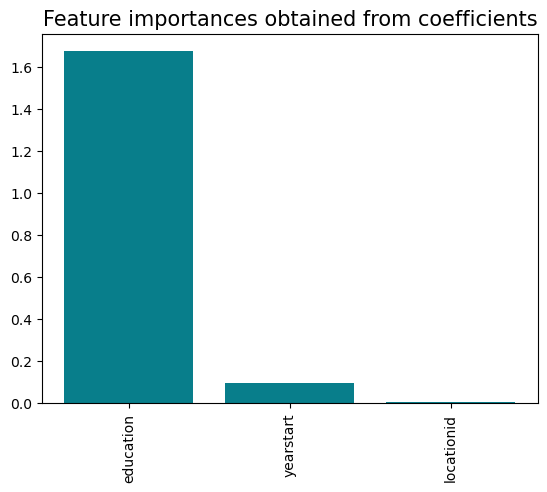

In [56]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=15)
plt.xticks(rotation='vertical')
plt.show()